Homework exercise 3
Deadline: upload to Moodle by 7 June 18:00 h
Please submit your homework either as a Jupyter Notebook or using .py files.

If you use .py files, please also include a PDF containing the output of your code and your explanations. Either way, the code needs to be in a form that can be easily run on another computer.

Name 1: Lisa-Maria Egger 01503839

Name 2: Josef Wieser 01309182

Name 3: David Wögerer 01453054

In [1]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Prerequisites
## log in into : 'https://www.reddit.com/prefs/apps' to get the data
CLIENT_ID = ''
CLIENT_SECRET = ''
USER_AGENT = ''

## Obtaining a Reddit Instance
## https://praw.readthedocs.io/en/latest/getting_started/quick_start.html followed the same steps
reddit = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT,
    username = '',
    password = '',
)


In [3]:
## Test if Reddit Instance was created successfully:
try:
    print('Congrats: Reddit-Instance created!')
    print('Instance:', reddit)
except:
    print('Reddit-Instance not created')

## Test if Reddit Instance can access Reddit:
try:
    print('Congrats: Reddit access granted!')
    print('Username:', reddit.user.me())
except:
    print('401 Error in accessing Reddit')


Congrats: Reddit-Instance created!
Instance: <praw.reddit.Reddit object at 0x000002A1F98882E0>
Congrats: Reddit access granted!
Username: PythonIIunivie


In [4]:
## help with submissions: https://praw.readthedocs.io/en/latest/code_overview/models/submission.html
## help with comments: https://praw.readthedocs.io/en/latest/tutorials/comments.html

## store the two subreddits as variables
## grab and save the top 1000 submission/posts of 'rising'
wsb = reddit.subreddit('wallstreetbets')
wsb1k = wsb.hot(limit=1000)                     ## limit = 10 only for testing
stk = reddit.subreddit('StockMarket')
stk1k = stk.hot(limit=1000)

## Wallstreetbets
titlewsb = []
contentwsb = []
commentswsb = []
comstringwsb = []
comavgswsb = []
for submission in wsb1k:
    titlewsb.append(submission.title)
    if submission.is_self:                      ## checks wheter it's a text or something else (picture, video,..)
        contentwsb.append('Text')
    else:
        contentwsb.append('Meme/Video')
    commentswsb.append(submission.num_comments)
    submission.comments.replace_more(limit=0)   ## replace_more() in order to solve the 'More Comments' problem
    comstrg = []
    for comment in submission.comments.list():  ## .list() in order to go down the rabbit hole and grab all comments and replies
        comstrg += comment.body.split()
    comstringwsb.append(comstrg)
    if len(comstrg) == 0:                       ##loop to not get a through zero division
        comavgswsb.append(0)
    else:
        comavgswsb.append(len(comstrg)/len(submission.comments.list()))

print('Number of submissions in wsb:', len(titlewsb))

dfwsb = (pd.DataFrame({'Title': titlewsb, 'Content': contentwsb, 'Number of Comments': commentswsb, 'Avg length of comments': comavgswsb, 'String of Comments': comstringwsb, 'Sub': np.full(len(titlewsb), 'wallstreetbets')}))

## StockMarket
titlestk = []
contentstk = []
commentsstk = []
comstringstk = []
comavgsstk = []
for submission in stk1k:
    titlestk.append(submission.title)
    if submission.is_self:
        contentstk.append('Text')
    else:
        contentstk.append('Meme/Video')
    commentsstk.append(submission.num_comments)
    submission.comments.replace_more(limit=0)
    comstrg = []
    for comment in submission.comments.list():
        comstrg += comment.body.split()
    comstringstk.append(comstrg)
    if len(comstrg) == 0:
        comavgsstk.append(0)
    else:
        comavgsstk.append(len(comstrg)/len(submission.comments.list()))

print('Number of submissions in stk:', len(titlestk))

dfstk = (pd.DataFrame({'Title': titlestk, 'Content': contentstk, 'Number of Comments': commentsstk, 'Avg length of comments': comavgsstk, 'String of Comments': comstringstk, 'Sub': np.full(len(titlestk), 'StockMarket')}))

dfx = pd.concat([dfwsb, dfstk])


Number of submissions in wsb: 195
Number of submissions in stk: 451


In [5]:
dfx.head()

,Title,Content,Number of Comments,Avg length of comments,String of Comments,Sub
0,"Daily Discussion Thread for June 07, 2021",Text,9084,10.072727,"[Upvote, if, you’re, retarded., Mr., CLNE, is,...",wallstreetbets
1,"Daily Popular Ticker Thread for June 07, 2021 ...",Text,3620,9.868421,"[274, BB, holding, strong, ., #$BB, LFGGGGG, !...",wallstreetbets
2,$BB vs. hedge fund anime,Meme/Video,453,11.671141,"[Why, was, I, so, engaged, and, why, do, I, wa...",wallstreetbets
3,Chad Money: Episode 3,Meme/Video,789,11.094688,"[""I'm, bullish, until, they, get, rid, of, $1....",wallstreetbets
4,Wall Street’s top brokers are quietly tighteni...,Text,202,29.706897,"[It’s, so, they, don’t, lose, money, when, the...",wallstreetbets


In [6]:
# Perceptron adapted from the lecture    
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=5, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state   
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
             errors = 0
             
             for xi, target in zip(X, y):
                 update = self.eta * (target - self.predict(xi))
                 self.w_[1:] += update * xi
                 self.w_[0] += update
                 errors += int(update != 0.0)
             self.errors_.append(errors)   
        return self, self.errors_
       
    def net_input (self,X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.net_input(X)>=0.0,1,-1)
    
    
     
# derive RedditClassifier from Perceptron    
class RedditClassifier(Perceptron):
   
    def __init__(self, df, classification = 'subreddit', list_category = ["wallstreetbets", "stockmarket"], eta=0.01, n_iter=10, random_state=1):
        Perceptron.__init__(self, eta, n_iter, random_state)
        self.df = df.copy()
        self.classification = classification
        self.list_category = list_category
    
    def preprocessing(self, df):
        y = df['Sub'].values
       
        self.y = np.where(y == 'wallstreetbets', -1, 1)
        df['dummy_content'] = np.where(df['Content'] == 'Text', -1, 1)
        df['stop_title'] = self.numb_stopwords(df, 'Title')
        df['stop_all_comments'] = self.numb_stopwords(df, 'String of Comments')
       
        # we need to convert the dataframe columns to an array, otherwise we would iterate over the name of the column as well when applying Zip(X,y) in the perceptron 
        self.X = df[['Number of Comments', 'Avg length of comments', 'dummy_content', 'stop_title', 'stop_all_comments']] .to_numpy()
        return df
        
        
    def fit(self):
        Perceptron.fit(self, self.X, self.y)
    
    def numb_stopwords(self, df, column):
        for i in range(0,len(df)):
            stopword = [word for word in df.iloc[i][column] if word in stopwords_list]
        return len(stopword)
    
    def learning_plot(self):
        plt.plot(range(1, len(self.errors_) + 1), [thing/self.X.shape[0] for thing in self.errors_], marker='o')
        plt.title('Learning Plot')
        plt.xlabel('Epochs')
        plt.ylabel('Updates/Errors in %')
        plt.show()
        return self
    
    
    def updates_plot(self):
        plt.plot(range(1, len(self.errors_) + 1), self.errors_, marker='o')
        plt.title('Update Plot')
        plt.xlabel('Epochs')
        plt.ylabel('Number of updates')
        plt.show()

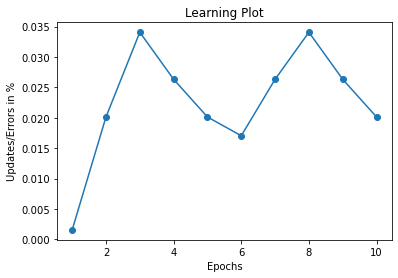

In [8]:
ppn = RedditClassifier(dfx)

ppn.preprocessing(dfx)
ppn.fit()

ppn.learning_plot()
#ppn.updates_plot()


In [12]:
# classification is by default set to subreddit
ppn.classification

'subreddit'

In [13]:
# list of names of the subreddit
ppn.list_category

['wallstreetbets', 'stockmarket']

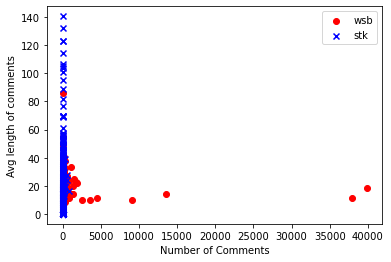

In [11]:
X = dfx.iloc[:, 2:4].values


plt.scatter(X[:len(titlewsb), 0], X[:len(titlewsb), 1],
color='red', marker='o', label='wsb')
plt.scatter(X[len(titlewsb):, 0], X[len(titlewsb):, 1],
color='blue', marker='x', label='stk')
plt.xlabel('Number of Comments')
plt.ylabel('Avg length of comments')
plt.legend(loc='upper right')
plt.show()
